<img src='https://camo.githubusercontent.com/bcb153b5a4eaa2bf3f97776188c6d0d9f2ff6ce5/68747470733a2f2f64336b65757a6562326372686b6e2e636c6f756466726f6e742e6e65742f6861636b657272616e6b2f6173736574732f7374796c6567756964652f6c6f676f5f776f72646d61726b2d66356335656236316162306131353463336564396564613234643062396533312e737667'>


# HackerRank Developer Survey 2018 

* Q1 - Which languages are the most popular ?
* Q2 - Age distribution ?
* Q3 - At which age do they begin coding, differences between genders ?
* Q4 - Countries of Respondents ?
* Q5 - Top countries characteristics - age began coding ?


참고 : 
 * https://www.kaggle.com/ymaricar/hackerrank-survey-focus-on-girl-code-power

In [1]:
import numpy as np
import pandas as pd

In [2]:
%ls data/

Country-Code-Mapping.csv
HackerRank-Developer-Survey-2018-Codebook.csv
HackerRank-Developer-Survey-2018-Numeric-Mapping.csv
HackerRank-Developer-Survey-2018-Numeric.csv*
HackerRank-Developer-Survey-2018-Numeric.csv.zip
HackerRank-Developer-Survey-2018-Values.csv*
HackerRank-Developer-Survey-2018-Values.csv.zip


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import plotly
# import plotly.plotly as py
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/HackerRank-Developer-Survey-2018-Values.csv', 
                 parse_dates=['StartDate','EndDate'])
df_n = pd.read_csv('data/HackerRank-Developer-Survey-2018-Numeric.csv', 
                   parse_dates=['StartDate','EndDate'])
df_women = df[df.q3Gender == 'Female']
df_men = df[df.q3Gender != 'Female']

In [5]:
df.shape

(25093, 251)

In [6]:
df = df.dropna(axis=0, how='all')
df.shape

(25092, 251)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25092 entries, 0 to 25092
Columns: 251 entries, RespondentID to q36Level4
dtypes: datetime64[ns](2), float64(5), object(244)
memory usage: 48.2+ MB


In [8]:
df.describe()

,RespondentID,q26FrameLearnPadrino2,q26FrameLearnDjango2,q26FrameLearnPyramid2,q34PositiveExp
count,2.509000e+04,0.0,0.0,0.0,9017.000000
mean,6.474331e+09,NaN,NaN,NaN,4.040590
std,8.666438e+06,NaN,NaN,NaN,1.024497
min,6.454811e+09,NaN,NaN,NaN,0.000000
25%,6.464812e+09,NaN,NaN,NaN,4.000000
50%,6.477487e+09,NaN,NaN,NaN,4.000000
75%,6.479849e+09,NaN,NaN,NaN,5.000000
max,6.490930e+09,NaN,NaN,NaN,5.000000


In [9]:
df.columns

Index(['RespondentID', 'StartDate', 'EndDate', 'CountryNumeric',
       'q1AgeBeginCoding', 'q2Age', 'q3Gender', 'q4Education', 'q0004_other',
       'q5DegreeFocus',
       ...
       'q30LearnCodeOther', 'q0030_other', 'q31Level3',
       'q32RecommendHackerRank', 'q0032_other', 'q33HackerRankChallforJob',
       'q34PositiveExp', 'q34IdealLengHackerRankTest', 'q0035_other',
       'q36Level4'],
      dtype='object', length=251)

In [10]:
prog = df[df.columns[139:163]]
prog['Gender'] = df['q3Gender']
prog = prog.dropna(axis=0, how='all')
prog.columns

Index(['q25LangC', 'q25LangCPlusPlus', 'q25LangJava', 'q25LangPython',
       'q25LangRuby', 'q25LangJavascript', 'q25LangCSharp', 'q25LangGo',
       'q25Scala', 'q25LangPerl', 'q25LangSwift', 'q25LangPascal',
       'q25LangClojure', 'q25LangPHP', 'q25LangHaskell', 'q25LangLua',
       'q25LangR', 'q25LangRust', 'q25LangTypescript', 'q25LangKotlin',
       'q25LangJulia', 'q25LangErlang', 'q25LangOcaml', 'q25LangOther',
       'Gender'],
      dtype='object')

In [11]:
prog[0:5]

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangGo,q25Scala,q25LangPerl,...,q25LangLua,q25LangR,q25LangRust,q25LangTypescript,q25LangKotlin,q25LangJulia,q25LangErlang,q25LangOcaml,q25LangOther,Gender
0,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,...,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,NaN,Female
1,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Will Learn,NaN,NaN,NaN,NaN,Male
2,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,...,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,NaN,Female
3,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
4,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female


In [12]:
for i in prog.columns[:-1] :
    print(i + ": "+str(prog[i].isnull().sum()))

q25LangC: 5904
q25LangCPlusPlus: 6218
q25LangJava: 3847
q25LangPython: 3440
q25LangRuby: 14793
q25LangJavascript: 4695
q25LangCSharp: 12500
q25LangGo: 14665
q25Scala: 16921
q25LangPerl: 18456
q25LangSwift: 16734
q25LangPascal: 19084
q25LangClojure: 19958
q25LangPHP: 12663
q25LangHaskell: 18584
q25LangLua: 19888
q25LangR: 15862
q25LangRust: 19340
q25LangTypescript: 16449
q25LangKotlin: 17186
q25LangJulia: 20517
q25LangErlang: 19933
q25LangOcaml: 20503
q25LangOther: 24011


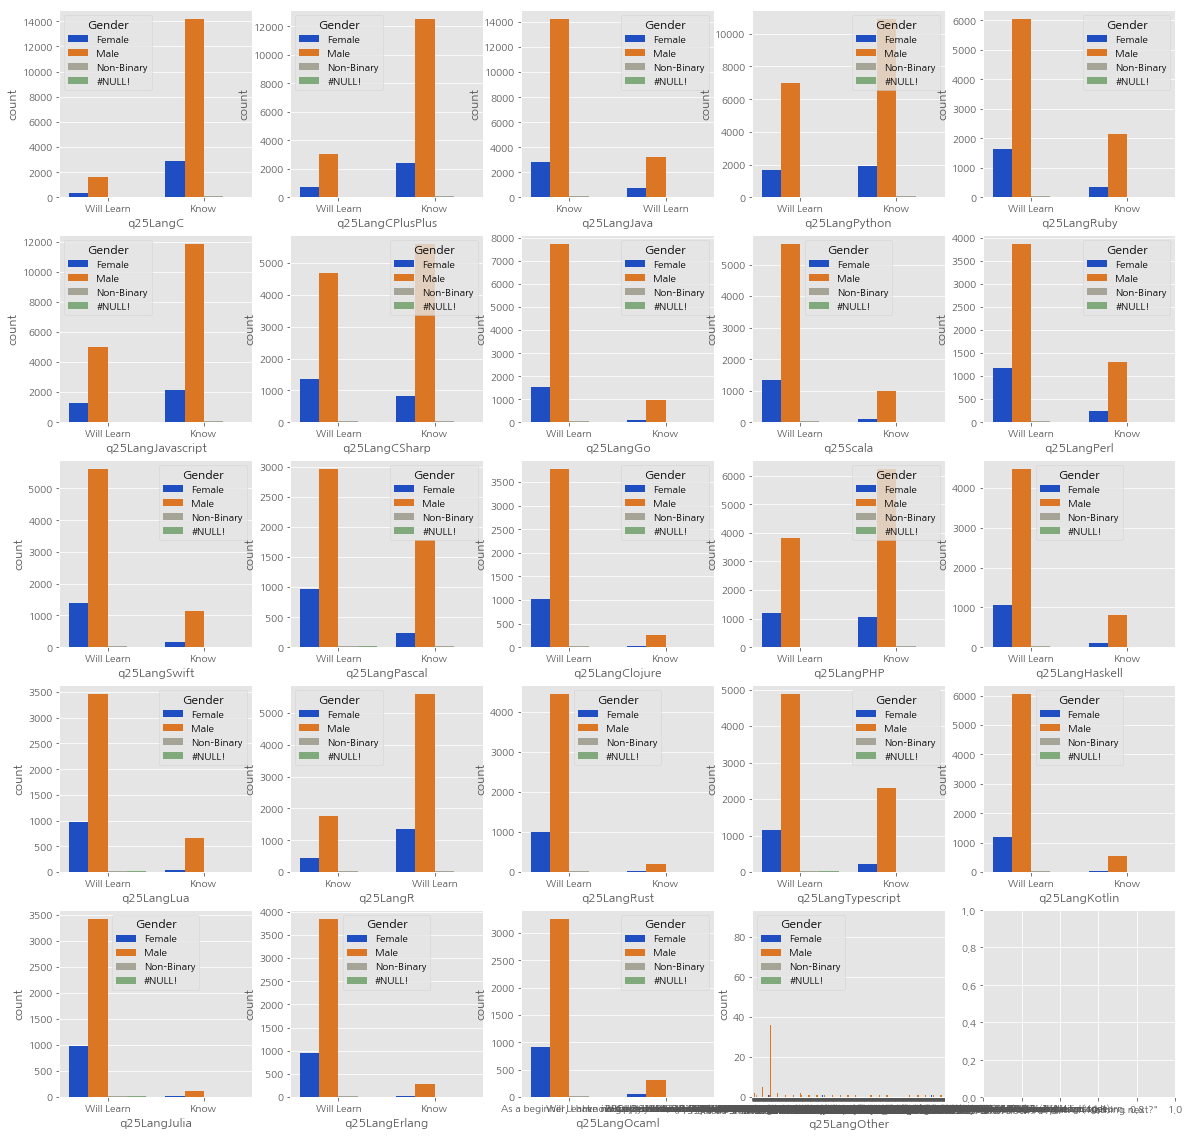

In [13]:
# 언어별 성비
colors = ["blue", "orange", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(20,20), ncols=5, nrows=5)
count = 0
times = 0
for i in prog.columns[:-1]:
    sns.countplot(x=str(i), 
                  hue="Gender", 
                  data=prog, 
                  palette = sns.xkcd_palette(colors), 
                  ax=ax[times][count])
    count += 1
    if count == 5 :
        times += 1
        count = 0

In [14]:
trace1 = go.Bar(
    x = df_men['q2Age'].value_counts().index.tolist(),
    y = np.multiply(np.divide(
        df_men['q2Age'].value_counts().tolist(),
        np.sum(df_men['q2Age'].value_counts().tolist())
    ).tolist(),100).tolist(),
    name='Men Respondents'
)
trace2 = go.Bar(
    x = df_women['q2Age'].value_counts().index.tolist(),
    y = np.multiply(np.divide(
        df_women['q2Age'].value_counts().tolist(),
        np.sum(df_women['q2Age'].value_counts().tolist())
    ).tolist(),100).tolist(),
    name='Female Respondents'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [15]:
trace1 = go.Bar(
    x=df_men['q1AgeBeginCoding'].value_counts().index.tolist(),
    y=np.multiply(np.divide(df_men['q1AgeBeginCoding'].value_counts().tolist(),np.sum(df_men['q1AgeBeginCoding'].value_counts().tolist())).tolist(),100).tolist(),
    name='Men Respondents'
)
trace2 = go.Bar(
    x=df_women['q1AgeBeginCoding'].value_counts().index.tolist(),
    y=np.multiply(np.divide(df_women['q1AgeBeginCoding'].value_counts().tolist(),np.sum(df_women['q1AgeBeginCoding'].value_counts().tolist())).tolist(),100).tolist(),
    name='Female Respondents'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [16]:
df = pd.read_csv('data/HackerRank-Developer-Survey-2018-Values.csv', 
                 parse_dates=['StartDate','EndDate'])
df_n= pd.read_csv('data/HackerRank-Developer-Survey-2018-Numeric.csv', 
                  parse_dates=['StartDate','EndDate'])
df_women = df[df.q3Gender == 'Female']
df_men = df[df.q3Gender != 'Female']

In [17]:
df.shape

(25093, 251)

In [18]:
df = df.dropna(axis=0, how='all')
df.shape

(25092, 251)

In [19]:
df.head(1)

,RespondentID,StartDate,EndDate,CountryNumeric,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6.464454e+09,2017-10-19 11:51:00,2017-10-20 12:05:00,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue


### 성별로 인기있는 언어

In [20]:
prog = df[df.columns[139:163]]
prog['Gender'] = df['q3Gender']
prog = prog.dropna(axis=0, how='all')
prog.columns

Index(['q25LangC', 'q25LangCPlusPlus', 'q25LangJava', 'q25LangPython',
       'q25LangRuby', 'q25LangJavascript', 'q25LangCSharp', 'q25LangGo',
       'q25Scala', 'q25LangPerl', 'q25LangSwift', 'q25LangPascal',
       'q25LangClojure', 'q25LangPHP', 'q25LangHaskell', 'q25LangLua',
       'q25LangR', 'q25LangRust', 'q25LangTypescript', 'q25LangKotlin',
       'q25LangJulia', 'q25LangErlang', 'q25LangOcaml', 'q25LangOther',
       'Gender'],
      dtype='object')

In [21]:
prog[0:5]

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangGo,q25Scala,q25LangPerl,...,q25LangLua,q25LangR,q25LangRust,q25LangTypescript,q25LangKotlin,q25LangJulia,q25LangErlang,q25LangOcaml,q25LangOther,Gender
0,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,...,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,NaN,Female
1,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Will Learn,NaN,NaN,NaN,NaN,Male
2,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,...,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,NaN,Female
3,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
4,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female


In [22]:
for i in prog.columns[:-1] :
    print(i + ": "+str(prog[i].isnull().sum()))

q25LangC: 5904
q25LangCPlusPlus: 6218
q25LangJava: 3847
q25LangPython: 3440
q25LangRuby: 14793
q25LangJavascript: 4695
q25LangCSharp: 12500
q25LangGo: 14665
q25Scala: 16921
q25LangPerl: 18456
q25LangSwift: 16734
q25LangPascal: 19084
q25LangClojure: 19958
q25LangPHP: 12663
q25LangHaskell: 18584
q25LangLua: 19888
q25LangR: 15862
q25LangRust: 19340
q25LangTypescript: 16449
q25LangKotlin: 17186
q25LangJulia: 20517
q25LangErlang: 19933
q25LangOcaml: 20503
q25LangOther: 24011


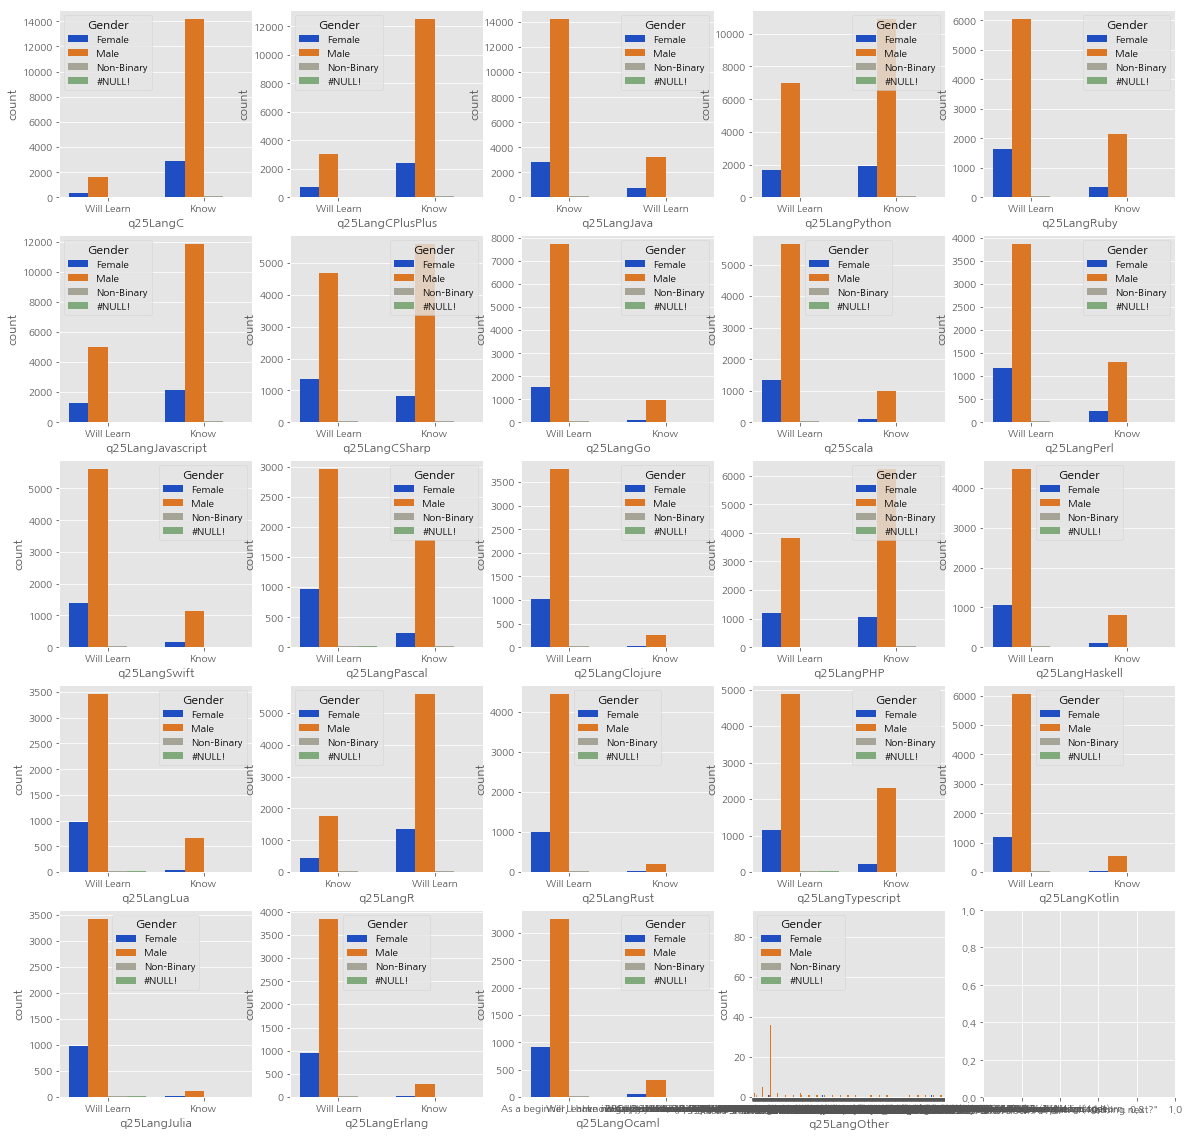

In [23]:
colors = ["blue", "orange", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(20,20), ncols=5, nrows=5)
count = 0
times = 0
for i in prog.columns[:-1]:
    #sns.regplot(x='value', y='wage', data=df_melt, ax=axs[count])
    sns.countplot(x=str(i), hue="Gender", data=prog, 
                  palette = sns.xkcd_palette(colors), ax=ax[times][count])
    count += 1
    if count == 5 :
        times += 1
        count = 0

### AgeBeginCoding

In [24]:
trace1 = go.Bar(
    x=df_men['q2Age'].value_counts().index.tolist(),
    y=np.multiply(np.divide(
        df_men['q2Age'].value_counts().tolist(),
        np.sum(df_men['q2Age'].value_counts().tolist())
    ).tolist(),100).tolist(),
    name='Men Respondents'
)
trace2 = go.Bar(
    x = df_women['q2Age'].value_counts().index.tolist(),
    y = np.multiply(np.divide(
        df_women['q2Age'].value_counts().tolist(),
        np.sum(df_women['q2Age'].value_counts().tolist())
    ).tolist(),100).tolist(),
    name = 'Female Respondents'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [25]:
trace1 = go.Bar(
    x = df_men['q1AgeBeginCoding'].value_counts().index.tolist(),
    y = np.multiply(np.divide(
        df_men['q1AgeBeginCoding'].value_counts().tolist(),
        np.sum(df_men['q1AgeBeginCoding'].value_counts().tolist())
    ).tolist(),100).tolist(),
    name='Men Respondents'
)
trace2 = go.Bar(
    x = df_women['q1AgeBeginCoding'].value_counts().index.tolist(),
    y = np.multiply(np.divide(
        df_women['q1AgeBeginCoding'].value_counts().tolist(),
        np.sum(df_women['q1AgeBeginCoding'].value_counts().tolist())
    ).tolist(),100).tolist(),
    name='Female Respondents'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [26]:
focus_country = df['CountryNumeric'].value_counts().to_frame()
print("our TOP 10 country respondents is :") 
print(focus_country.head(10).index)

our TOP 10 country respondents is :
Index(['Ghana', 'India', 'United States', 'Sudan', 'Malaysia', 'Brazil',
       'Russian Federation', 'United Kingdom', 'Canada', 'Indonesia'],
      dtype='object')


### TOP 10 country respondents

In [27]:
focus_country = df['CountryNumeric'].value_counts().to_frame()
print("our TOP 10 country respondents is :") 
print(focus_country.head(10).index)

our TOP 10 country respondents is :
Index(['Ghana', 'India', 'United States', 'Sudan', 'Malaysia', 'Brazil',
       'Russian Federation', 'United Kingdom', 'Canada', 'Indonesia'],
      dtype='object')


In [29]:
data = [ dict(
        type = 'choropleth',
        locations = focus_country.index,
        locationmode = 'country names',
        z = focus_country['CountryNumeric'],
        text = focus_country['CountryNumeric'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 1
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Respondents'),
      ) ]

layout = dict(
    title = 'Number of respondents by country',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [32]:
focus_country.head(10)

,CountryNumeric
Ghana,4402
India,3734
United States,3186
Sudan,1753
Malaysia,1120
Brazil,766
Russian Federation,371
United Kingdom,326
Canada,311
Indonesia,233


In [33]:
df_men_c = [0,0,0]
df_women_c = [0,0,0]
count = 0
for i in focus_country.head(3).index : 
    df_men_c[count] = df_men[df_men['CountryNumeric'] == i]
    df_women_c[count] = df_women[df_women['CountryNumeric'] == i]
    print('N° of Male respondents for '+ i + ' is : '+ str(df_men_c[count].shape[0]))
    print('N° of Female respondents for '+ i + ' is : '+ str(df_women_c[count].shape[0]))
    
    trace1 = go.Bar( 
    x=df_men_c[count]['q1AgeBeginCoding'].value_counts().index.tolist(),
    y=np.multiply(np.divide(df_men_c[count]['q1AgeBeginCoding'].value_counts().tolist(),np.sum(df_men_c[count]['q1AgeBeginCoding'].value_counts().tolist())).tolist(),100).tolist(),
    name='Men Respondents in '+i
    )
    trace2 = go.Bar(
    x=df_women_c[count]['q1AgeBeginCoding'].value_counts().index.tolist(),
    y=np.multiply(np.divide(df_women_c[count]['q1AgeBeginCoding'].value_counts().tolist(),np.sum(df_women_c[count]['q1AgeBeginCoding'].value_counts().tolist())).tolist(),100).tolist(),
    name='Female Respondents in '+i
    )

    data = [trace1, trace2]
    layout = go.Layout(
        barmode='group'
    )

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='grouped-bar')
    count = count + 1

N° of Male respondents for Ghana is : 3510
N° of Female respondents for Ghana is : 892


N° of Male respondents for India is : 3167
N° of Female respondents for India is : 567


N° of Male respondents for United States is : 2640
N° of Female respondents for United States is : 546
